## Using Reddit API for pulling text from internet or scraping the data from internet

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="7lsJxROv7r2IQEfiAsqf2Q",
    client_secret="5ye7Q30c7b5hvxbID8vfKg9985HUBQ",
    user_agent=user_agent
)

In [3]:
headlines = set()
for submission in reddit.subreddit("google").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Support Megathread - November 2023
17kz862
AutoModerator
1698796901.0
15
1.0
https://www.reddit.com/r/google/comments/17kz862/support_megathread_november_2023/
0


In [4]:
headlines = set()
for submission in reddit.subreddit("google").hot(limit=None):
    headlines.add(submission.title) 
print(len(headlines))

177


In [5]:
#Create a dataframe 
df = pd.DataFrame(headlines)

In [6]:
df.columns = ["Titles"]
df.head(15) # Display the first 15 rows of the DataFrame

,Titles
0,Seinfeld - George Costanza's Bank Symbol
1,Help download
2,Try this...😄
3,Deleted Gmail
4,"I installed Gemini, it replaced my assistant b..."
5,I got irritated at Google assistant in my sleep
6,"Google, what is this? You can't get more simpl..."
7,Google's layoffs already impacted its culture....
8,Google Paying $350M Over Google+ Scandal
9,Room for 1 More Geminite? GPT-4 …Coincidence? ...


In [7]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
df["Titles"]= df["Titles"].apply(cleanTxt)
df["Titles"]= df["Titles"].apply(remove_emoji)

#Show the clean text
df.head()

,Titles
0,Seinfeld - George Costanza's Bank Symbol
1,Help download
2,Try this...
3,Deleted Gmail
4,"I installed Gemini, it replaced my assistant b..."


In [8]:
df.Titles.duplicated().sum()

0

## Different kinds of plots 

In [9]:
df['length'] = df['Titles'].str.len()
df.head()

,Titles,length
0,Seinfeld - George Costanza's Bank Symbol,40
1,Help download,13
2,Try this...,11
3,Deleted Gmail,13
4,"I installed Gemini, it replaced my assistant b...",151


In [10]:
df['length'].plot()

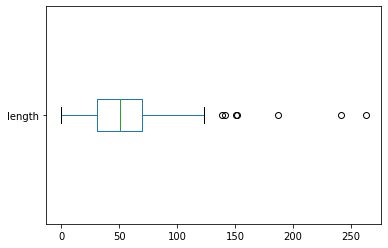

In [11]:
df['length'].plot(kind='box', vert=False)

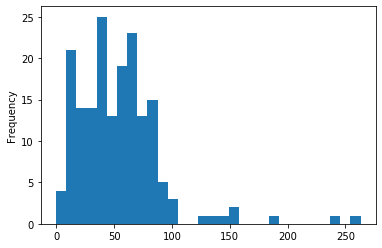

In [12]:
df['length'].plot(kind='hist', bins=30)

##  Use regex to remove stop words. 

In [13]:
import regex as re
import nltk

nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

{'will', 'your', 'doesn', 'has', 'ma', 'ourselves', "haven't", 'a', 'until', 'haven', 'yourself', 'do', 'these', 'while', 'yours', "don't", 'or', "mustn't", 'shouldn', 'ours', 'can', 'no', 'most', 'such', 're', 'myself', 'just', 'not', "you've", "hadn't", 'in', 'hers', 'of', 'didn', 'above', 'herself', 'against', 'only', 'when', 'so', 'more', 'my', 'wasn', 'his', 'themselves', 'the', 'he', 'own', 'should', "couldn't", 's', 'needn', "shouldn't", 'their', 'our', 'an', 'out', 'don', 'through', 'hasn', 'as', "doesn't", 'mustn', 'hadn', 'nor', 'shan', "you'll", 'about', 'from', 'what', 'here', 'ain', 'again', 'there', "she's", 'i', 'over', 'all', "that'll", "you'd", 'some', 'him', 'am', 'who', 'very', 'weren', 'were', 'be', 'couldn', 'that', 'each', 'between', 've', "weren't", 'himself', 'll', 'isn', 'this', 'them', 'after', "wouldn't", "needn't", 'below', "you're", 'we', 'and', 'up', 'if', 'because', 'to', 'under', 'her', 'further', 'where', 'are', 'before', 'for', "should've", "shan't", '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\123ch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Create Pipeline, Remove Stop Words

In [14]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['Titles'].apply(prepare, pipeline=pipeline)
df.head()

,Titles,length,tokens
0,Seinfeld - George Costanza's Bank Symbol,40,"[seinfeld, george, costanza, bank, symbol]"
1,Help download,13,"[help, download]"
2,Try this...,11,[try]
3,Deleted Gmail,13,"[deleted, gmail]"
4,"I installed Gemini, it replaced my assistant b...",151,"[installed, gemini, replaced, assistant, usele..."


In [15]:
from collections import Counter

counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('google', 96), ('gemini', 19), ('ai', 18), ('new', 13), ('bard', 10)]


In [16]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
google,96
gemini,19
ai,18
new,13
bard,10
advanced,10
pixel,9
search,9
messages,7


In [17]:
freq_df.describe()

,freq
count,694.000000
mean,1.544669
std,3.862372
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,96.000000


## Word Frequency Analysis

[Text(0, 0.5, 'Token'),
 Text(0.5, 0, 'Frequency'),
 Text(0.5, 1.0, 'Most Repeated Words')]

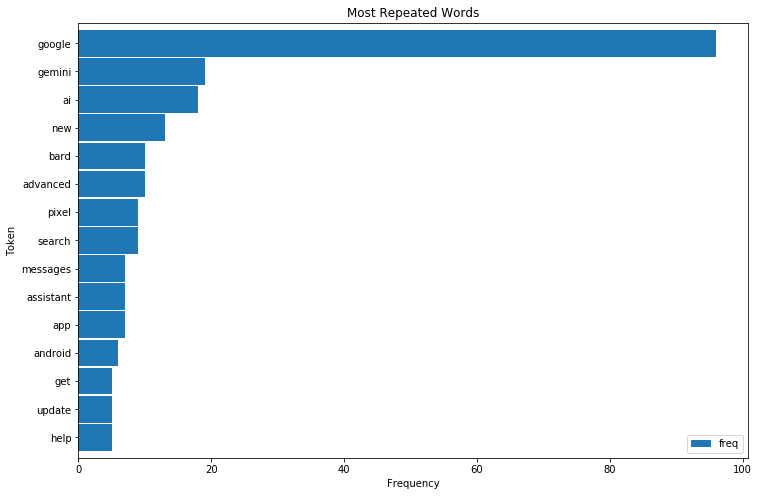

In [18]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Most Repeated Words')

## Word Cloud

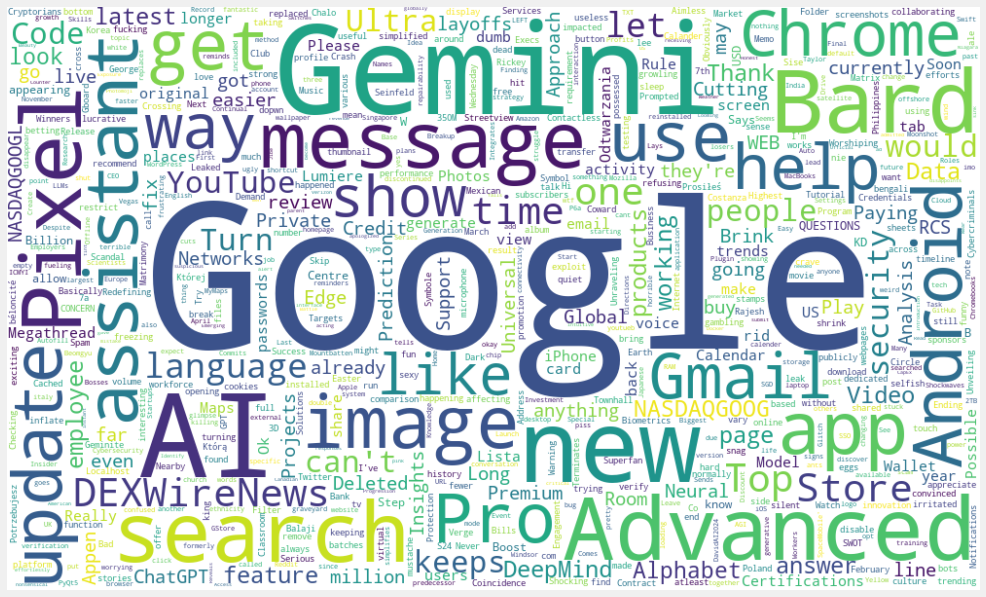

In [19]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
text = ' '.join( [twts for twts in df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 5000,
                      stopwords = stopwords,
                      background_color="white").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10)) # Set the size 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [20]:
import re

# Sample strings
sample_strings = [
    "123chbharat@gmail.com",
    "123-456-7890",
    "2024-02-14",
    "192.168.1.1"
]

# Regex patterns
regex_patterns = [
    r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$',
    r'^\d{3}-\d{3}-\d{4}$',
    r'^\d{4}-\d{2}-\d{2}$',
    r'^(https?://)?(?:www\.)?([^/]+)(\/(.*))?$',
    r'^(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)$'
]

# Iterate through sample strings and apply regex patterns
for string, pattern in zip(sample_strings, regex_patterns):
    match = re.match(pattern, string)
    if match:
        print(f"String: {string}")
        print(f"Regex Pattern: {pattern}")
        print("Match found:", match.group())
        print()
    else:
        print(f"No match found for string: {string}")
        print()


String: 123chbharat@gmail.com
Regex Pattern: ^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$
Match found: 123chbharat@gmail.com

String: 123-456-7890
Regex Pattern: ^\d{3}-\d{3}-\d{4}$
Match found: 123-456-7890

String: 2024-02-14
Regex Pattern: ^\d{4}-\d{2}-\d{2}$
Match found: 2024-02-14

String: 192.168.1.1
Regex Pattern: ^(https?://)?(?:www\.)?([^/]+)(\/(.*))?$
Match found: 192.168.1.1



## Sentiment analysis

In [21]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"


df['Subjectivity'] = df['Titles'].apply(getSubjectivity)
df['Polarity'] = df['Titles'].apply(getPolarity)    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(25)

,Titles,length,tokens,Subjectivity,Polarity,Insight
0,Seinfeld - George Costanza's Bank Symbol,40,"[seinfeld, george, costanza, bank, symbol]",0.000000,0.000,Neutral
1,Help download,13,"[help, download]",0.000000,0.000,Neutral
2,Try this...,11,[try],0.000000,0.000,Neutral
3,Deleted Gmail,13,"[deleted, gmail]",0.000000,0.000,Neutral
4,"I installed Gemini, it replaced my assistant b...",151,"[installed, gemini, replaced, assistant, usele...",0.533333,-0.150,Negative
5,I got irritated at Google assistant in my sleep,47,"[got, irritated, google, assistant, sleep]",0.000000,0.000,Neutral
6,"Google, what is this? You can't get more simpl...",73,"[google, get, simplified, already]",0.500000,0.500,Positive
7,Google's layoffs already impacted its culture....,85,"[google, layoffs, already, impacted, culture, ...",0.000000,0.000,Neutral
8,Google Paying $350M Over Google+ Scandal,40,"[google, paying, 350m, google, scandal]",0.000000,0.000,Neutral
9,Room for 1 More Geminite? GPT-4 …Coincidence? ...,68,"[room, geminite, gpt-4, coincidence, coward, o...",0.500000,0.250,Positive


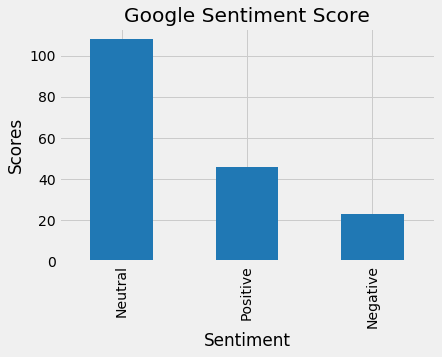

In [22]:
import seaborn as sns
import warnings

plt.style.use('fivethirtyeight')
plt.title("Google Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## Bing liu score

In [23]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
print('Total number of words in opinion lexicon', len(opinion_lexicon.words()))
print('Examples of positive words',opinion_lexicon.positive()[:5])
print('Examples of negative words',opinion_lexicon.negative()[:5])

Total number of words in opinion lexicon 6789
Examples of positive words ['a+', 'abound', 'abounds', 'abundance', 'abundant']
Examples of negative words ['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable']


In [24]:
pos_score = 1
neg_score = -1
word_dict = {}

for word in opinion_lexicon.positive():
    word_dict[word] = pos_score


for word in opinion_lexicon.negative():
    word_dict[word] = neg_score
    
def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower())
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    return sentiment_score

df['Bing_Liu_Score'] = df['Titles'].apply(bing_liu_score)

In [25]:
df[["Titles", 'Bing_Liu_Score']].head(10)

,Titles,Bing_Liu_Score
0,Seinfeld - George Costanza's Bank Symbol,0
1,Help download,0
2,Try this...,0
3,Deleted Gmail,0
4,"I installed Gemini, it replaced my assistant b...",-1
5,I got irritated at Google assistant in my sleep,-1
6,"Google, what is this? You can't get more simpl...",1
7,Google's layoffs already impacted its culture....,0
8,Google Paying $350M Over Google+ Scandal,-1
9,Room for 1 More Geminite? GPT-4 …Coincidence? ...,-1
